## 21.6 Project
### Basin Hopping Algorithm
Basin-hopping is a stochastic algorithm which attempts to find the global minimum of a smooth scalar function of one or more variables. The algorithm in its current form was described by David Wales and Jonathan Doye.
http://www-wales.ch.cam.ac.uk/.

The method has been descibed in the following two papers
- http://pubs.acs.org/doi/pdf/10.1021/jp970984n
- http://science.sciencemag.org/content/271/5248/484

It has been implemented in scipy. To use it, one just need to do the following.

```python
from scipy.optimize import basinhopping

N_atom = 12
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=50, T=2.0, stepsize=3.0, disp=True)
```

The algorithm is very easy to implement. Here is another example.
- https://gitlab.com/ase/ase/blob/master/ase/optimize/basin.py

### Due by Nov. 28, 2017

Please use basin hopping method to find all the ground states for LJ clusters for (N=10-20).

Try to 
- 1, write down the priciples of basin hopping algorithm
- 2, choose three numbers bewteen 10 - 20
- 3, find the parameters which could lead to the global minimum.
- 4, plot the energy evolutions as a function of steps.


Extra
- visulatization of energy landscape: http://pele-python.github.io/pele/#

**Basin Hopping**

Basin Hopping is a global optimization algorithm used to find the global minimum of a function.  It is an iterative process that takes the potential and turns it into a series of steps. From there it perturbs the initial coordinates and finds a local minimum value. The value of the local minimum is then accepted or rejected using various methods, though the one used in scipy is the Metropolis criterion of the standard Monte Carlo algorithms(a). This method has been used with great success on problems in physics and chemistry.  In its current form, the algorithm was described by David Wales and Jonathan Doye(b).

To apply this to the Lennard jones potential function, we need to first need to define the Lennard Jones potential function and compute the total energy, E, and the atomic positions.

In [ ]:
import numpy as np

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12-1/r6)

def total_energy(positions):
    E=0
    N_atom = int(len(positions/3))
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

Then we can alter this code to inclue a generalized basin hopping aglorithm from scipy.

In [ ]:
import numpy as np
#first we need to import the package that contains basin hopping
from scipy.optimize import basinhopping


def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12-1/r6)

def total_energy(positions):
    E=0
    N_atom = int(len(positions/3))
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

#Relevant code for basin hopping with out parameters
N_atom = 
pos = init_pos
res = sy.basinhopping(total_energy, pos, niter=, T=, stepsize=, disp=True)

The dependent parameter total _energy, pos, niter=, T=, stepsize=, and disp=True, all have specific functions in the algorithm. The first two are functions defined previously in the code. The next three are arguments that must be adjusted to obtain the correct minimum. 

Their functions are as follows:

1- niter= Sets the number of iterations to be attempted

2- T= temperature. This sets the acceptable jump size that will be accepted.

3- stepsize= This dictates the x axis travel for each iteration. 

Let us run the code for three instances with the number of atoms between 10 - 20.

First we will attempt N_atom=12.


In [40]:
import numpy as np
#first we need to import the package that contains basin hopping
from scipy.optimize import basinhopping

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)



def total_energy(positions):
    E = 0
    N_atom = int(len(positions)/3)
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

N_atom = 12
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=30, T=1.5, stepsize=3.0, disp=True)

basinhopping step 0: f -37.9676
basinhopping step 1: f -37.9676 trial_f -35.172 accepted 0  lowest_f -37.9676
basinhopping step 2: f -37.9676 trial_f -35.3526 accepted 0  lowest_f -37.9676
basinhopping step 3: f -37.9676 trial_f -33.2376 accepted 0  lowest_f -37.9676
basinhopping step 4: f -36.243 trial_f -36.243 accepted 1  lowest_f -37.9676
basinhopping step 5: f -36.243 trial_f -34.5967 accepted 0  lowest_f -37.9676
basinhopping step 6: f -36.243 trial_f -35.394 accepted 0  lowest_f -37.9676
basinhopping step 7: f -36.243 trial_f -34.9517 accepted 0  lowest_f -37.9676
basinhopping step 8: f -36.243 trial_f -34.4597 accepted 0  lowest_f -37.9676
basinhopping step 9: f -35.3181 trial_f -35.3181 accepted 1  lowest_f -37.9676
basinhopping step 10: f -35.172 trial_f -35.172 accepted 1  lowest_f -37.9676
basinhopping step 11: f -36.3471 trial_f -36.3471 accepted 1  lowest_f -37.9676
basinhopping step 12: f -34.8456 trial_f -34.8456 accepted 1  lowest_f -37.9676
basinhopping step 13: f -37

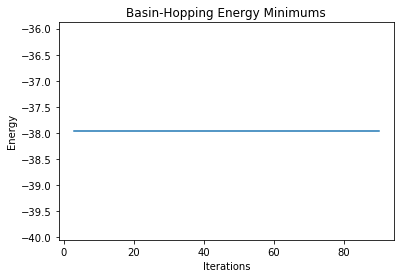

In [42]:
import matplotlib.pyplot as plt

x = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90]
y = [-37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676, -37.9676]

plt.plot(x, y)
plt.xlabel('Iterations')
plt.ylabel('Energy')
plt.title('Basin-Hopping Energy Minimums')
plt.show()

This one found the minimum right away. It closely matches the cambridge cluster database value of -37.967600.

Now for N_atom=13

In [29]:
import numpy as np
#first we need to import the package that contains basin hopping
from scipy.optimize import basinhopping

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)



def total_energy(positions):
    E = 0
    N_atom = int(len(positions)/3)
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

N_atom = 13
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=30, T=1.5, stepsize=3.0, disp=True)

basinhopping step 0: f -37.2932
basinhopping step 1: f -37.2932 trial_f -30.6055 accepted 0  lowest_f -37.2932
basinhopping step 2: f -40.7585 trial_f -40.7585 accepted 1  lowest_f -40.7585
found new global minimum on step 2 with function value -40.7585
basinhopping step 3: f -39.8383 trial_f -39.8383 accepted 1  lowest_f -40.7585
basinhopping step 4: f -39.7008 trial_f -39.7008 accepted 1  lowest_f -40.7585
basinhopping step 5: f -39.7008 trial_f -38.3027 accepted 0  lowest_f -40.7585
basinhopping step 6: f -44.3268 trial_f -44.3268 accepted 1  lowest_f -44.3268
found new global minimum on step 6 with function value -44.3268
basinhopping step 7: f -44.3268 trial_f -40.6738 accepted 0  lowest_f -44.3268
basinhopping step 8: f -44.3268 trial_f -38.2541 accepted 0  lowest_f -44.3268
basinhopping step 9: f -44.3268 trial_f -39.2296 accepted 0  lowest_f -44.3268
basinhopping step 10: f -39.7059 trial_f -39.7059 accepted 1  lowest_f -44.3268
basinhopping step 11: f -39.7059 trial_f -36.5246

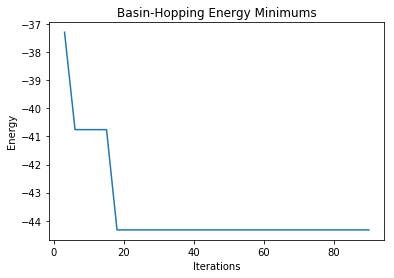

In [38]:
import matplotlib.pyplot as plt

x = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90]
y = [-37.2932, -40.7585, -40.7585, -40.7585, -40.7585, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268, -44.3268]

plt.plot(x, y)
plt.xlabel('Iterations')
plt.ylabel('Energy')
plt.title('Basin-Hopping Energy Minimums')
plt.show()

This closely matches the Cambridge cluster database value of -44.326801.

Now, For N_atom=14:

In [43]:
import numpy as np
#first we need to import the package that contains basin hopping
from scipy.optimize import basinhopping

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)



def total_energy(positions):
    E = 0
    N_atom = int(len(positions)/3)
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

N_atom = 14
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=30, T=1.5, stepsize=3.0, disp=True)

basinhopping step 0: f -44.9546
basinhopping step 1: f -44.9546 trial_f -30.9023 accepted 0  lowest_f -44.9546
basinhopping step 2: f -44.9546 trial_f -43.0378 accepted 0  lowest_f -44.9546
basinhopping step 3: f -44.9546 trial_f -42.1588 accepted 0  lowest_f -44.9546
basinhopping step 4: f -44.9546 trial_f -38.0383 accepted 0  lowest_f -44.9546
basinhopping step 5: f -44.9546 trial_f -43.2582 accepted 0  lowest_f -44.9546
basinhopping step 6: f -44.9546 trial_f -42.1461 accepted 0  lowest_f -44.9546
basinhopping step 7: f -47.8452 trial_f -47.8452 accepted 1  lowest_f -47.8452
found new global minimum on step 7 with function value -47.8452
basinhopping step 8: f -47.8452 trial_f -43.9457 accepted 0  lowest_f -47.8452
basinhopping step 9: f -47.8452 trial_f -43.1629 accepted 0  lowest_f -47.8452
basinhopping step 10: f -47.8452 trial_f -42.0052 accepted 0  lowest_f -47.8452
basinhopping step 11: f -47.8452 trial_f -43.0859 accepted 0  lowest_f -47.8452
basinhopping step 12: f -47.8452 

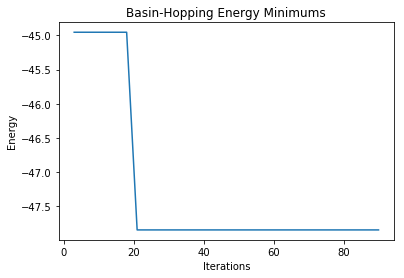

In [44]:
import matplotlib.pyplot as plt

x = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90]
y = [-44.9546, -44.9546, -44.9546, -44.9546, -44.9546, -44.9546, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452, -47.8452]

plt.plot(x, y)
plt.xlabel('Iterations')
plt.ylabel('Energy')
plt.title('Basin-Hopping Energy Minimums')
plt.show()

Once again this matches the Cambridge cluster database value of -47.845157.

And finally for N_atom=19

In conclusion, we have successfully minimized the Lennard-Jones potential for 3 different groupings of atoms. The results closely matched the Cambridge cluster database values for those number of atoms.

**References**

a: 	Li, Z. and Scheraga, H. A., Monte Carlo-minimization approach to the multiple-minima problem in protein folding, Proc. Natl. Acad. Sci. USA, 1987, 84, 6611.

b:	Wales, D J, and Doye J P K, Global Optimization by Basin-Hopping and the Lowest Energy Structures of Lennard-Jones Clusters Containing up to 110 Atoms. Journal of Physical Chemistry A, 1997, 101, 5111.
